In [ ]:
import pandas as pd
from numpy import *
from sklearn import *
from sklearn.metrics import *
from matplotlib.pyplot import *
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
 dataset = pd.read_csv('kd.csv')

In [ ]:
dataset.dtypes

id                          int64
age                       float64
blood pressure            float64
sg                        float64
albumin                   float64
su                        float64
red blood cells            object
pus cell                   object
puc cell clumps            object
ba                         object
bgr                       float64
bu                        float64
Serum creatinine          float64
sod                       float64
pot                       float64
Haemoglobin               float64
Packed cell volume         object
White blood cell count     object
Red blood cell count       object
htn                        object
dm                         object
cad                        object
Appetite                   object
pe                         object
Anaemia                    object
classification             object
dtype: object

In [ ]:
  dataset.shape

(400, 26)

In [ ]:
dataset.describe()

,id,age,blood pressure,sg,albumin,su,bgr,bu,Serum creatinine,sod,pot,Haemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
dataset.head()

,id,age,blood pressure,sg,albumin,su,red blood cells,pus cell,puc cell clumps,ba,bgr,bu,Serum creatinine,sod,pot,Haemoglobin,Packed cell volume,White blood cell count,Red blood cell count,htn,dm,cad,Appetite,pe,Anaemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
dataset.isnull().sum()

id                          0
age                         9
blood pressure             12
sg                         47
albumin                    46
su                         49
red blood cells           152
pus cell                   65
puc cell clumps             4
ba                          4
bgr                        44
bu                         19
Serum creatinine           17
sod                        87
pot                        88
Haemoglobin                52
Packed cell volume         70
White blood cell count    105
Red blood cell count      130
htn                         2
dm                          2
cad                         2
Appetite                    1
pe                          1
Anaemia                     1
classification              0
dtype: int64

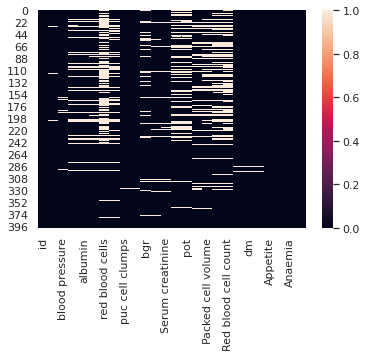

In [ ]:
sns.heatmap(dataset.isnull())

In [ ]:
ls1=['age','blood pressure','sg','albumin','su','bgr','bu','Serum creatinine','sod','pot','Haemoglobin']
mean=dataset.mean(axis=0)
for i in ls1:
    dataset[i]=dataset[i].fillna(mean[i])
dataset.iloc[:,16]=dataset.iloc[:,16].fillna(method='pad')
dataset.iloc[:,17]=dataset.iloc[:,17].fillna(method='pad')
dataset.iloc[:,18]=dataset.iloc[:,18].fillna(method='pad')
dataset['classification']=dataset['classification'].replace('ckd\t','ckd')
dataset['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
dataset=dataset.dropna(axis=0)
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
ls=[6,7,8,9,19,20,21,22,23,24,25]
for i in ls:   
    dataset.iloc[:,i]=enc.fit_transform(dataset.iloc[:,i])


In [ ]:

# Rows containing duplicate data
duplicate_rows_dataset = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_dataset.shape)

number of duplicate rows:  (0, 26)


array([0, 1])

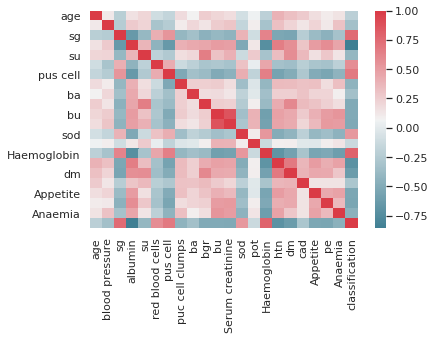

In [ ]:

cor=dataset.iloc[:,1:].corr()
from seaborn import *
cmap=diverging_palette(220,10,as_cmap=True)
heatmap(cor,cmap=cmap,annot=False)
dataset['classification'].unique()

In [ ]:
#feature selection
columns = np.full((cor.shape[0],), True, dtype=bool)
for i in range(cor.shape[0]):
    for j in range(i+1, cor.shape[0]):
        if cor.iloc[i,j] >= 0.5:
            if columns[j]:
                columns[j] = False
selected_columns = cor.columns[columns]
x=dataset[selected_columns]
y=dataset['classification']
area=[]

In [ ]:
selected_columns

Index(['age', 'blood pressure', 'sg', 'albumin', 'su', 'red blood cells',
       'puc cell clumps', 'ba', 'sod', 'pot', 'cad'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

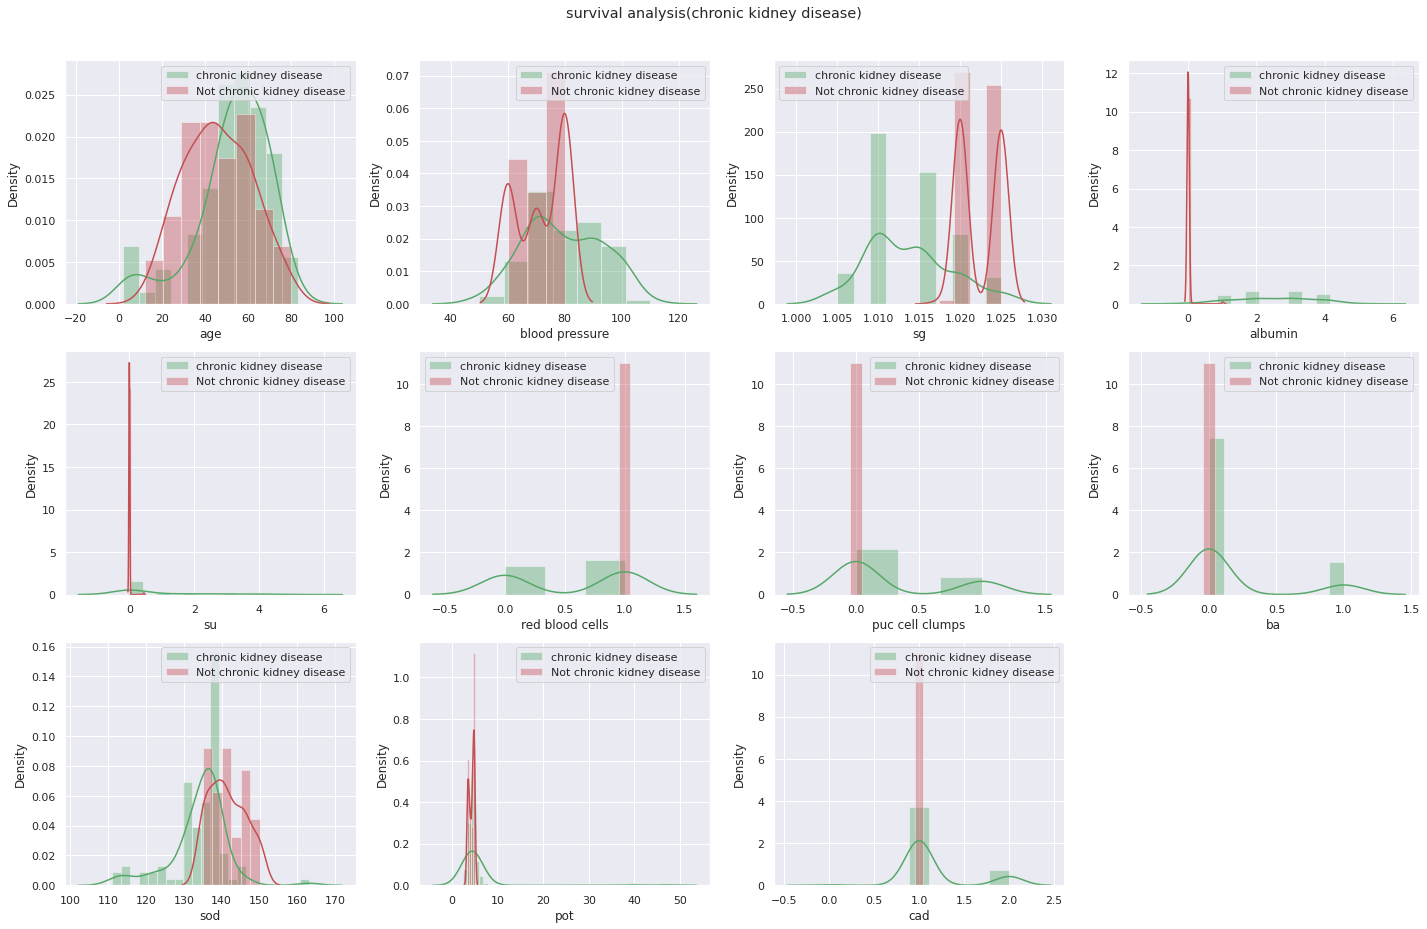

In [ ]:
#data analysis using distribution plot
fig = figure(figsize = (20, 25))
j = 0
for i in x.columns:
    subplot(6, 4, j+1)
    j += 1
    distplot(x[i][dataset['classification']==0], color='g', label = 'chronic kidney disease')
    distplot(x[i][dataset['classification']==1], color='r', label = 'Not chronic kidney disease')
    legend(loc='best')
fig.suptitle('survival analysis(chronic kidney disease)')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=0)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#xtrain = sc.fit_transform(xtrain)
#xtest = sc.transform(xtest)
#print(xtest)
sample=dataset.iloc[:,0:25]
sample.head()

,id,age,blood pressure,sg,albumin,su,red blood cells,pus cell,puc cell clumps,ba,bgr,bu,Serum creatinine,sod,pot,Haemoglobin,Packed cell volume,White blood cell count,Red blood cell count,htn,dm,cad,Appetite,pe,Anaemia
2,2,62.0,80.000000,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,137.528754,4.627244,9.6,31,7500,5.2,0,1,1,1,0,1
3,3,48.0,70.000000,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.000000,2.500000,11.2,32,6700,3.9,1,0,1,1,1,1
4,4,51.0,80.000000,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,137.528754,4.627244,11.6,35,7300,4.6,0,0,1,0,0,0
7,7,24.0,76.469072,1.015,2.0,4.0,1,0,0,0,410.0,31.0,1.1,137.528754,4.627244,12.4,44,6900,5,0,1,1,0,1,0
8,8,52.0,100.000000,1.015,3.0,0.0,1,0,1,0,138.0,60.0,1.9,137.528754,4.627244,10.8,33,9600,4,1,1,1,0,0,1


In [ ]:

# import module
import pandas as pd
  
# assign dataframes
data1 = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]],
                     columns=['A', 'B', 'C'])
  
data2 = pd.DataFrame([[1, 3, 34], [7, 9,22],[4,6,19]],
                     columns=['A', 'C','D'])
  
# display dataframes
print('Dataframes:')
display(data1)
display(data2)
  
# merge two data frames
print('After merging:')
pd.merge(data1, data2, how='right')

Dataframes:


,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


,A,C,D
0,1,3,34
1,7,9,22
2,4,6,19


After merging:


,A,B,C,D
0,1,2,3,34
1,7,8,9,22
2,4,5,6,19


1. Using Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
start = time.time()
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest) 
xtest['rich_score'] = y_pred
merged_inner = pd.merge(sample, xtest, how='right')
merged_inner.head()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,age,blood pressure,sg,albumin,su,red blood cells,pus cell,puc cell clumps,ba,bgr,bu,Serum creatinine,sod,pot,Haemoglobin,Packed cell volume,White blood cell count,Red blood cell count,htn,dm,cad,Appetite,pe,Anaemia,rich_score
0,387,15.0,80.0,1.025,0.0,0.0,1,1,0,0,93.0,17.0,0.9,136.0,3.9,16.7,50,6200,5.2,0,0,1,0,0,0,1
1,305,41.0,80.0,1.020,0.0,0.0,1,1,0,0,122.0,25.0,0.8,138.0,5.0,17.1,41,9100,5.2,0,0,1,0,0,0,1
2,337,44.0,70.0,1.025,0.0,0.0,1,1,0,0,92.0,40.0,0.9,141.0,4.9,14.0,52,7500,6.2,0,0,1,0,0,0,1
3,355,23.0,60.0,1.020,0.0,0.0,1,1,0,0,95.0,24.0,0.8,145.0,5.0,15.0,52,6300,4.6,0,0,1,0,0,0,1
4,292,30.0,80.0,1.020,0.0,0.0,1,1,0,0,89.0,42.0,0.5,139.0,5.0,16.7,52,10200,5,0,0,1,0,0,0,1


In [ ]:
# predict probabilities
y_pred = classifier.predict(xtest)
#print(lr_probs)
# keep probabilities for the positive outcome only
#print(lr_probs)
ns_probs = [0 for _ in range(len(ytest))]
#print(ns_probs)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, y_pred)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Random Prediction: ROC AUC=0.500
Logistic: ROC AUC=0.951


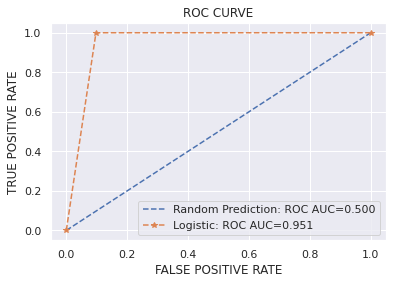

In [ ]:
import matplotlib.pyplot as plt
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, y_pred)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Logistic: ROC AUC=%.3f' % (lr_auc))
# axis labels
plt.title('ROC CURVE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

2. Using Gaussian Naive Bayes Classifier

Accuracy :  0.9787234042553191
Time elapsed:  0.0019106864929199219


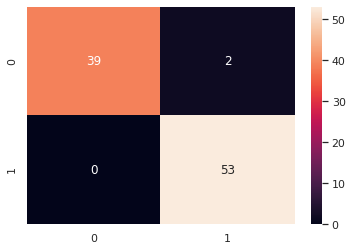

In [ ]:
from sklearn.naive_bayes import GaussianNB
start =time.time()
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
end = time.time()
t1=end-start
y_pred1=gnb.predict(xtest)
acc1=accuracy_score(ytest, y_pred1)
print ("Accuracy : ", accuracy_score(ytest, y_pred1))
print("Time elapsed: ",t1)
cm1 = confusion_matrix(ytest, y_pred1)
sns.heatmap(cm1,annot=True)

In [ ]:
# predict probabilities
y_pred1 = gnb.predict(xtest)
#print(lr_probs)
# keep probabilities for the positive outcome only

#print(lr_probs)
ns_probs = [0 for _ in range(len(ytest))]
#print(ns_probs)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
nb_auc = roc_auc_score(ytest, y_pred1)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))

Random Prediction: ROC AUC=0.500
Naive Bayes: ROC AUC=0.976


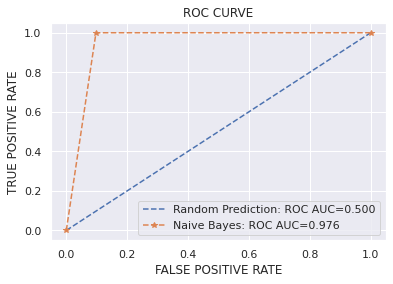

In [ ]:
import matplotlib.pyplot as plt
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(ytest, y_pred1)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# axis labels
plt.title('ROC CURVE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

3. Using KNN Classifier

Accuracy :  0.9148936170212766
Time elapsed:  0.0015532970428466797


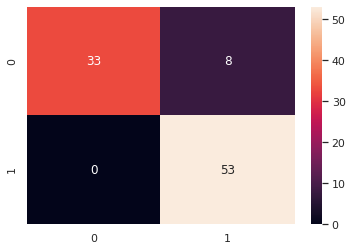

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(xtrain, ytrain)
end = time.time()
t2 = end - start
y_pred2 = knn.predict(xtest)
acc2=accuracy_score(ytest, y_pred2)
print ("Accuracy : ", accuracy_score(ytest, y_pred2))
print("Time elapsed: ",t2)
cm2 = confusion_matrix(ytest, y_pred2) 
sns.heatmap(cm2,annot=True)

In [ ]:
# predict probabilities
y_pred2 = knn.predict(xtest)
#print(lr_probs)
# keep probabilities for the positive outcome only

#print(lr_probs)
ns_probs = [0 for _ in range(len(ytest))]
#print(ns_probs)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
kn_auc = roc_auc_score(ytest, y_pred2)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (kn_auc))

Random Prediction: ROC AUC=0.500
KNN: ROC AUC=0.902


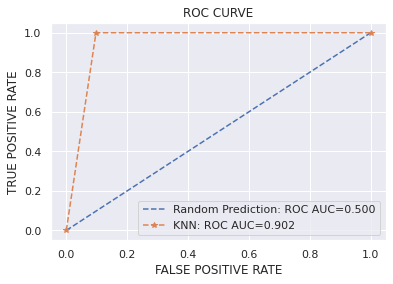

In [ ]:
import matplotlib.pyplot as plt
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
kn_fpr, kn_tpr, _ = roc_curve(ytest, y_pred2)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='KNN: ROC AUC=%.3f' % (kn_auc))
# axis labels
plt.title('ROC CURVE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

4. Using Decision Tree Classifier


Accuracy :  0.9893617021276596
Time elapsed:  0.0021114349365234375


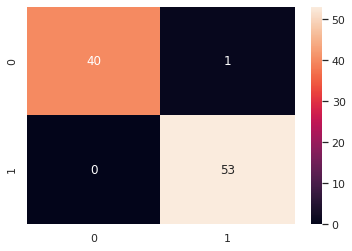

In [ ]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(xtrain, ytrain)
end = time.time()
t3 = end - start
y_pred3 = decision_tree.predict(xtest)
acc3=accuracy_score(ytest, y_pred3)
print ("Accuracy : ", accuracy_score(ytest, y_pred3)) 
print("Time elapsed: ",t3)
cm3 = confusion_matrix(ytest, y_pred3) 
sns.heatmap(cm3,annot=True)

In [ ]:
# predict probabilities
y_pred3 = decision_tree.predict(xtest)
#print(lr_probs)
# keep probabilities for the positive outcome only

#print(lr_probs)
ns_probs = [0 for _ in range(len(ytest))]
#print(ns_probs)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
dt_auc = roc_auc_score(ytest, y_pred3)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))

Random Prediction: ROC AUC=0.500
Decision Tree: ROC AUC=0.988


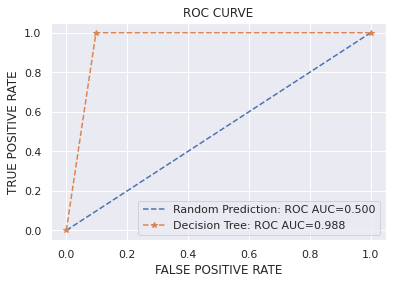

In [ ]:
import matplotlib.pyplot as plt
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(ytest, y_pred3)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Decision Tree: ROC AUC=%.3f' % (dt_auc))
# axis labels
plt.title('ROC CURVE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

5. Using Random Forest Classifier

Accuracy :  0.9893617021276596
Time elapsed:  0.1361982822418213


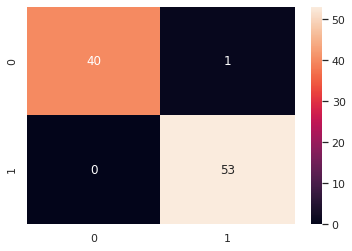

In [ ]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
end = time.time()
t4 = end - start
y_pred4 = rfc.predict(xtest)
acc4=accuracy_score(ytest, y_pred4)
print ("Accuracy : ", accuracy_score(ytest, y_pred4)) 
print("Time elapsed: ",t4)
cm4 = confusion_matrix(ytest, y_pred4) 
sns.heatmap(cm4,annot=True)

In [ ]:
# predict probabilities
y_pred4 = rfc.predict(xtest)
#print(lr_probs)
# keep probabilities for the positive outcome only

#print(lr_probs)
ns_probs = [0 for _ in range(len(ytest))]
#print(ns_probs)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
rf_auc = roc_auc_score(ytest, y_pred4)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.988


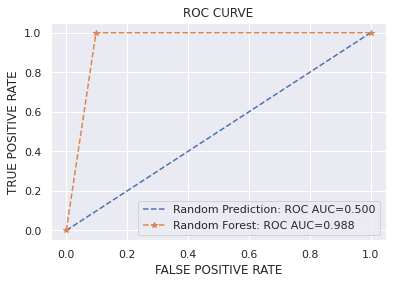

In [ ]:
import matplotlib.pyplot as plt
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(ytest, y_pred4)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Random Forest: ROC AUC=%.3f' % (rf_auc))
# axis labels
plt.title('ROC CURVE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

6. Using Support Vector Classification

Accuracy :  0.9857142857142858
Time elapsed:  0.0011835098266601562


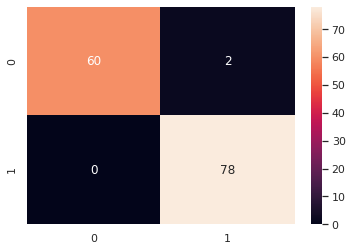

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.6,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.svm import SVC
start = time.time()
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(x_train, y_train)
end = time.time()
t5 = end-start
y_pred5 = svm.predict(x_test)
acc5=accuracy_score(y_test, y_pred5)
print ("Accuracy : ", accuracy_score(y_test, y_pred5))
print("Time elapsed: ",t5)
cm5 = confusion_matrix(y_test, y_pred5) 
sns.heatmap(cm5,annot=True)

In [ ]:
# predict probabilities
y_pred5 = svm.predict(x_test)
#print(lr_probs)
# keep probabilities for the positive outcome only

#print(lr_probs)
ns_probs = [0 for _ in range(len(y_test))]
#print(ns_probs)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
sv_auc = roc_auc_score(y_test, y_pred5)
# summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('SVC: ROC AUC=%.3f' % (sv_auc))

Random Prediction: ROC AUC=0.500
SVC: ROC AUC=0.984


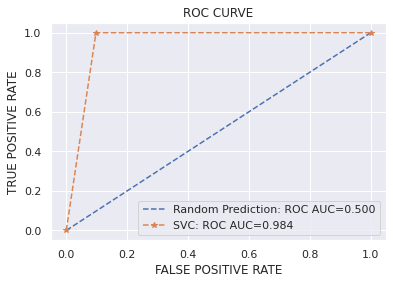

In [ ]:
import matplotlib.pyplot as plt
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
sv_fpr, sv_tpr, _ = roc_curve(y_test, y_pred5)
# plot the roc curve for the model

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='SVC: ROC AUC=%.3f' % (sv_auc))
# axis labels
plt.title('ROC CURVE')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
# show the legend
plt.legend()
# show the plot
plt.show()

ROC AUC Analysis

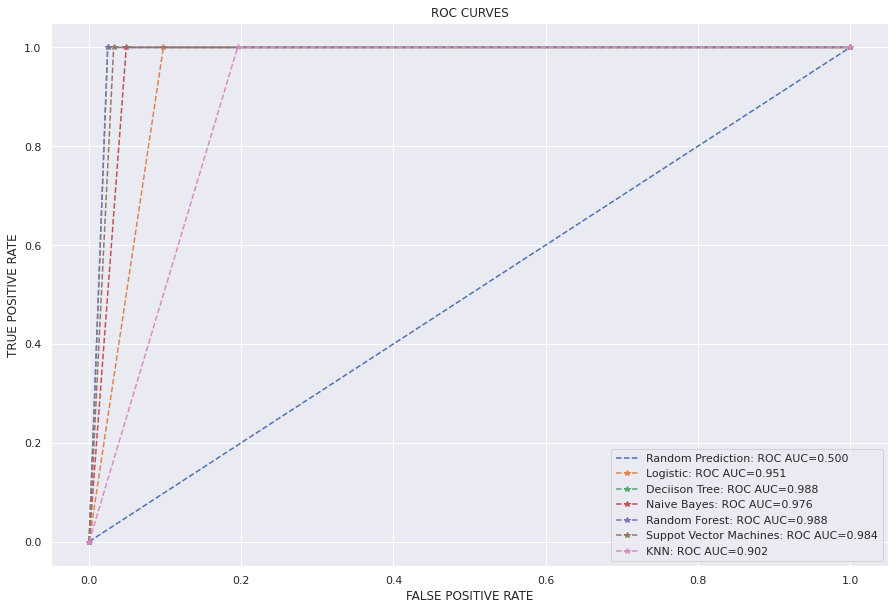

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(lr_fpr, lr_tpr, linestyle='--',marker='*', label='Logistic: ROC AUC=%.3f' % (lr_auc))
plt.plot(dt_fpr, dt_tpr, linestyle='--',marker='*',label='Deciison Tree: ROC AUC=%.3f' % (dt_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
plt.plot(sv_fpr, sv_tpr, linestyle='--',marker='*',label='Suppot Vector Machines: ROC AUC=%.3f' % (sv_auc))
plt.plot(kn_fpr, kn_tpr, linestyle='--',marker='*',label='KNN: ROC AUC=%.3f' % (kn_auc))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
# show the legend
plt.legend()
# show the plot
plt.show()

Accuracy Analysis

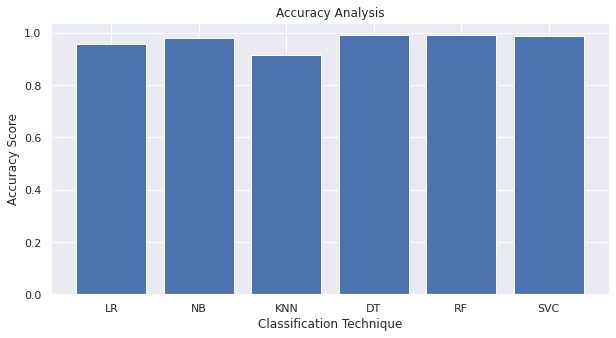

In [ ]:
ct = ['LR','NB','KNN','DT','RF','SVC']
ac = [acc,acc1,acc2,acc3,acc4,acc5]
fig = plt.figure(figsize = (10, 5)) 
plt.bar(ct, ac) 
plt.xlabel("Classification Technique") 
plt.ylabel("Accuracy Score") 
plt.title("Accuracy Analysis")
plt.show() 


Time Elapsed Analysis

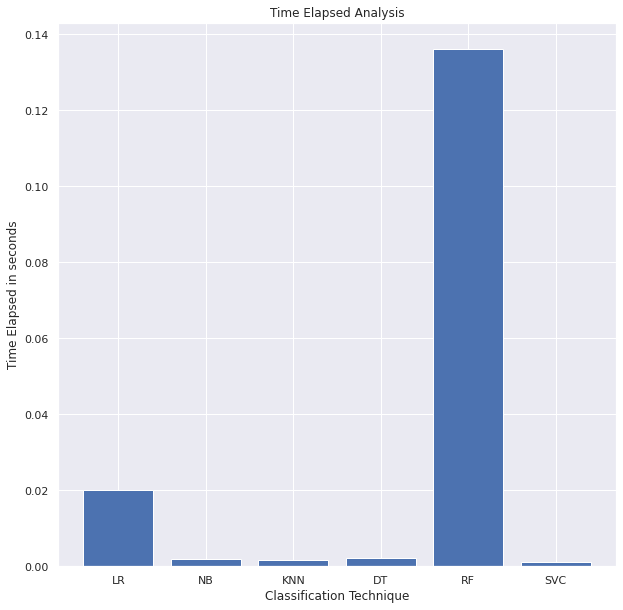

In [ ]:
ct = ['LR','NB','KNN','DT','RF','SVC']
tt = [t,t1,t2,t3,t4,t5]
fig = plt.figure(figsize = (10, 10)) 
plt.bar(ct,tt) 
plt.xlabel("Classification Technique") 
plt.ylabel("Time Elapsed in seconds") 
plt.title("Time Elapsed Analysis") 
plt.show()